In [1]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.tri as tri
import datetime 
import time
#import netcdftime
import sys
import glob
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import os
from scipy.interpolate import griddata
import csv
#from mpl_toolkits.basemap import Basemap
from scipy import interpolate
import xarray as xr

In [468]:
colors_orig = [ (103,0,31),(178,24,43),(214,96,77),(244,165,130),(253,219,199),(255,255,255),(209,229,240),(146,197,222),(67,147,195),(33,102,172),(5,48,97)]
colorsm=[[a/255. for a in x] for x in colors_orig]
div_color= LinearSegmentedColormap.from_list( 'div_color', colorsm, N=20)
level=np.arange(-1,1.1,.1) #-.6,.5,.05)  #
bounds=level.tolist()
cmap = div_color
cmaplist = [cmap(i) for i in range(cmap.N,0,-1)]
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [469]:
datafile.dims

Frozen({'time': 1, 'cell': 2949120, 'nv': 3, 'height': 120, 'bnds': 2})

In [470]:
datafile = xr.open_dataset("../Masterarbeit/crosssection_data/fc_DOM01_0002_URB_temp_grid.nc") 
#datafile = datafile.isel(height=slice(60))
a = datafile.variables['T'][0,:,:]

In [506]:
cor = xr.open_dataset('../Masterarbeit/crosssection_data/extpar_icon_grid_0026_R03B07_G.nc')
luf = cor.variables['LU_CLASS_FRACTION'][:,:]
topo = cor.variables['topography_c'][:]

In [472]:
clons  = np.rad2deg(datafile.variables["clon"])#[::-1] 
clats  = np.rad2deg(datafile.variables["clat"])#[::-1] 

#clons  = datafile.variables["clon"][::-1] 
#clats  = datafile.variables["clat"][::-1] 

In [609]:
hhl_file = xr.open_dataset("../Masterarbeit/crosssection_data/hhl.nc")
hhl = hhl_file.variables["HHL"][0,:,:]#[::-1]
hhl_f = hhl
### Full levels: because the levels are defined at half levels, it is corrected here
for k in range(1,hhl.shape[0]):
    hhl_f[k,:] = hhl[k,:] + (hhl[k,:]-hhl[k-1,:])/2


/srv/conda3/envs/py3-general/lib/python3.9/site-packages/xarray/coding/times.py:154: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/srv/conda3/envs/py3-general/lib/python3.9/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda3/envs/py3-general/lib/python3.9/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instea

In [610]:
hhl_file.variables["HHL"][0,]

<xarray.Variable (height: 121, ncells: 2949120)>
[356843520 values with dtype=float32]
Attributes:
    long_name:                    Geometric Height of the layer limits above ...
    units:                        m
    param:                        6.3.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [603]:
hhl_file.variables["HHL"][0,:,:]

<xarray.Variable (height: 121, cell: 2949120)>
[356843520 values with dtype=float32]
Attributes:
    long_name:      Geometric Height of the layer limits above sea level(NN)
    units:          m
    param:          6.3.0
    CDI_grid_type:  unstructured

In [638]:
lar1 = 51.5
lar2 = 53.5
lor1 = 12
lor2 = 14


ind=[]
for i in range(0,clons.shape[0]):
    if ((clats[i]<lar2 and clats[i]>lar1) and (clons[i]>lor1 and clons[i]<lor2)): #find the indexes and select the values after
        ind.append(i)

In [639]:
ind

[646430,
 646431,
 646432,
 646453,
 646454,
 646455,
 646456,
 646460,
 646461,
 646462,
 646463,
 646528,
 646529,
 646530,
 646532,
 646533,
 646534,
 646535,
 646536,
 646538,
 646539,
 646541,
 646544,
 646545,
 646546,
 646547,
 646548,
 646549,
 646550,
 646551,
 646552,
 646553,
 646554,
 646555,
 646556,
 646557,
 646558,
 646559,
 646560,
 646561,
 646562,
 646563,
 646567,
 646568,
 646569,
 646570,
 646571,
 646572,
 646573,
 646574,
 646575,
 646580,
 646581,
 646582,
 646592,
 646593,
 646594,
 646595,
 646596,
 646597,
 646598,
 646599,
 646600,
 646601,
 646602,
 646603,
 646604,
 646605,
 646606,
 646607,
 646608,
 646609,
 646610,
 646611,
 646612,
 646613,
 646614,
 646615,
 646616,
 646617,
 646618,
 646619,
 646620,
 646621,
 646622,
 646623,
 646624,
 646625,
 646626,
 646627,
 646628,
 646629,
 646630,
 646631,
 646632,
 646633,
 646634,
 646635,
 646636,
 646637,
 646638,
 646639,
 646640,
 646641,
 646642,
 646644,
 646645,
 646646,
 646647,
 646648,
 646649,
 

In [640]:
#cross section

lo_i = 12.1
la_i = 52.51
lo_f = 13.9
la_f = 52.53

lo_line = np.linspace(lo_i,lo_f,60)
la_line = np.linspace(la_i,la_f,60)
cross_line = np.vstack(( np.linspace(lo_i,lo_f,60), np.linspace(la_i,la_f,60) )).T
interp_method = 'cubic'
c = []
### Cross line as tuples
for i in range(1,cross_line.shape[0]+1):
    c.append(i)
lons=clons[ind]
lats=clats[ind]
lons=lons
i_c=np.vstack((lons,lats)).T

In [641]:
cross_val=np.zeros((hhl_f.shape[0]-1,len(cross_line)))
cross_fl =np.zeros((hhl_f.shape[0]-1,len(cross_line)))
cross_test =np.zeros((hhl_f.shape[0]-1,len(cross_line)))

In [642]:
# HORIZONTAL INTERPOLATION
for i in range(a.shape[0]-1,0,-1):
    hhlf_i = griddata(i_c,hhl_f[i,ind],cross_line,method=interp_method)
#    print(i, hhlf_i)
    test = griddata(i_c,a[i,ind],cross_line,method=interp_method)
#    print(i,test)
    val = test - np.nanmean(test)
#    print(val)
    cross_val[i,:] = val
    cross_fl[i,:] = hhlf_i
    cross_test[i,:] = c

In [657]:
#for i in range(120):
#    print(i, hhl_f[i,ind].mean().values)

In [658]:
#for i in range (120):
#    print(i, cross_fl[i,:].mean())

In [645]:
# VERTICAL INTERPOLATION
#z = np.linespace
x_labels = []
cross_line_lab = np.vstack([ np.linspace(lo_i,lo_f,60), np.linspace(la_i,la_f,60) ]).T
#for pair in cross_line:
    #'{:.2f}'.format(pair[0])
x_labels = [['{:.2f}'.format(pair[0]),'{:.2f}'.format(pair[1])] for pair in cross_line_lab]
print(x_labels)

[['12.10', '52.51'], ['12.13', '52.51'], ['12.16', '52.51'], ['12.19', '52.51'], ['12.22', '52.51'], ['12.25', '52.51'], ['12.28', '52.51'], ['12.31', '52.51'], ['12.34', '52.51'], ['12.37', '52.51'], ['12.41', '52.51'], ['12.44', '52.51'], ['12.47', '52.51'], ['12.50', '52.51'], ['12.53', '52.51'], ['12.56', '52.52'], ['12.59', '52.52'], ['12.62', '52.52'], ['12.65', '52.52'], ['12.68', '52.52'], ['12.71', '52.52'], ['12.74', '52.52'], ['12.77', '52.52'], ['12.80', '52.52'], ['12.83', '52.52'], ['12.86', '52.52'], ['12.89', '52.52'], ['12.92', '52.52'], ['12.95', '52.52'], ['12.98', '52.52'], ['13.02', '52.52'], ['13.05', '52.52'], ['13.08', '52.52'], ['13.11', '52.52'], ['13.14', '52.52'], ['13.17', '52.52'], ['13.20', '52.52'], ['13.23', '52.52'], ['13.26', '52.52'], ['13.29', '52.52'], ['13.32', '52.52'], ['13.35', '52.52'], ['13.38', '52.52'], ['13.41', '52.52'], ['13.44', '52.52'], ['13.47', '52.53'], ['13.50', '52.53'], ['13.53', '52.53'], ['13.56', '52.53'], ['13.59', '52.53'],

In [651]:
c[0]

1

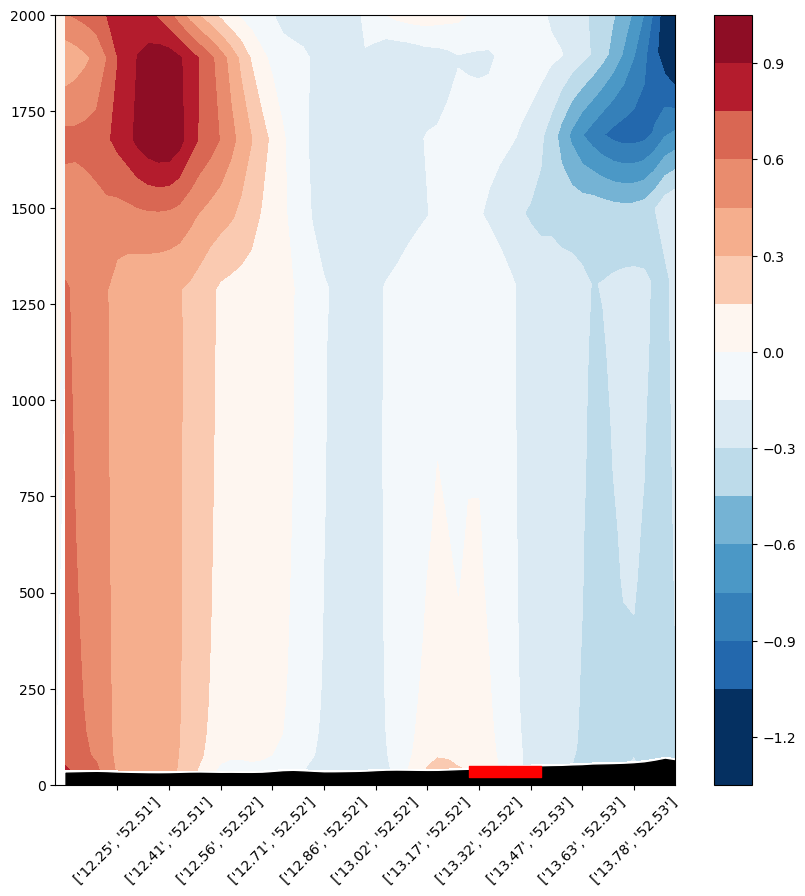

In [656]:
fig, ax =plt.subplots( figsize=(10, 10))
plt.contourf(cross_test,cross_fl, cross_val,20, cmap=cmap)

## interp of invar fields:
topo_i = griddata(i_c,topo[ind],cross_line,method=interp_method)
lu_i = griddata(i_c,luf[18,ind],cross_line,method=interp_method)

plt.fill_between(c,-5,topo_i,color='k')

lu_urb = lu_i

for i in range(0,lu_i.shape[0]):
  if (lu_urb[i]<.6):
      lu_urb[i]= np.nan
  else:
      lu_urb[i]=20

plt.fill_between(c,50,lu_urb,color='r')

plt.ylim(0,2000)
#plt.xlim(30,30)
plt.xticks(c[5::5],x_labels[5::5],rotation=45)
plt.colorbar()
plt.show()